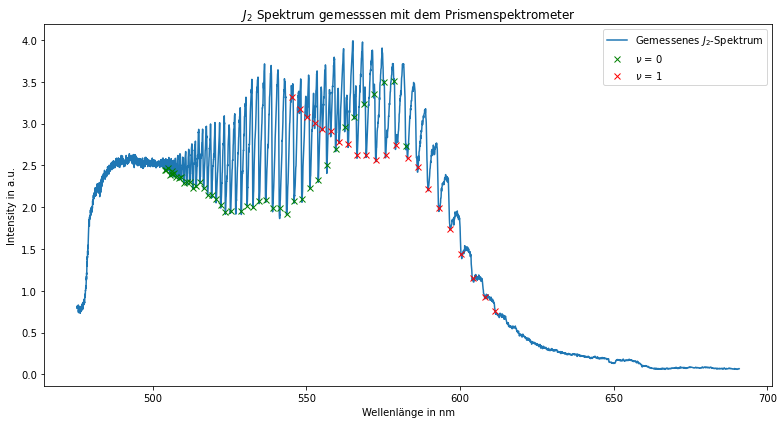

In [207]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from matplotlib.gridspec import GridSpec
## Parameter [7.05835870e-08 1.01924329e-03 4.75424576e+02]
class Banden:
    def __init__(self,path):
        data = np.genfromtxt(path)
        self.step = []
        self.voltage = []
        for line in data:
            self.step.append(line[0])
            self.voltage.append(line[1])
        self.manuel_peaks_first_bond = self.manuel([14130,14280,14480,14690,14860,14900,15100,15320,15560,15820,16080,16380,16660,16950,17290,17630,17970,18330,18680,19090,19500,19890,20320,21220,21670,22140,22630,23130,23650,24190,24680,25210,25770,26320,26890,27470,28050,28630,29230,29830,30460,31050,31670,32370])
        self.manuel_peaks_second_bond = self.manuel([25070,25590,26100,26640,27160,27720,28270,28850,29420,29980,30580,31170,31760,32460,33050,33650,34250,34860,35460,36070,36730,37260])

    def steptowavelenght(self,step):
        step = np.array(step)
        return (7.05835870e-08*step**2 + 1.01924329e-03*step + 4.75424576e+02)

    def manuel(self,peaks):
        peak_step =[]
        peak_voltage = []
        for peak in peaks:
            peak_step.append(self.step[int(peak/10)])
            peak_voltage.append(self.voltage[int(peak/10)])
        return peak_step,peak_voltage

    def plotwithpeaks(self):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title(r"$J_2$ Spektrum gemesssen mit dem Prismenspektrometer")
        fig1.set_ylabel("Intensity in a.u.")
        fig1.set_xlabel("Wellenlänge in nm")
        #fig1.set_xlim(10000,40000)
        fig1.plot(self.steptowavelenght(self.step),self.voltage,label=r"Gemessenes $J_2$-Spektrum")
        fig1.plot(self.steptowavelenght(self.manuel_peaks_first_bond[0]),self.manuel_peaks_first_bond[1],"gx",label=r"$\nu$ = 0")
        fig1.plot(self.steptowavelenght(self.manuel_peaks_second_bond[0]),self.manuel_peaks_second_bond[1],"rx",label=r"$\nu$ = 1")
        plt.tight_layout()
        plt.legend()
        plt.show()

manuel_peaks_first_bond = [14130,14280,14480,14690,14860,14900,15100,15320,15560,15820,16080,16380,16660,16950,17290,17630,17970,18330,18680,19090,19500,19890,20320,21220,21670,22140,22630,23130,23650,24190,24680,25210,25770,26320,26890,27470,28050,28630,29230,29830,30460,31050,31670,32370]
manuel_peaks_second_bond = [25070,25590,26100,26640,27160,27720,28270,28850,29420,29980,30580,31170,31760,32460,33050,33650,34250,34860,35460,36070,36730,37260]


bande = Banden('./data/1_-4_ohneLinse.dat')
bande.plotwithpeaks()
